In [4]:
#!pip install flask-cors opencv-python matplotlib Flask pyngrok numpy requests pybase64 google-generativeai
# pip install 

In [1]:
import cv2
import matplotlib.pyplot as plt
from flask import *
from pyngrok import ngrok
import json
import io
import base64
import numpy as np
import requests
from PIL import Image, ImageDraw, ImageFont



In [6]:
port_no = 3030
from flask_cors import CORS

In [7]:
def highlight_regions(image_path, predictions):

    image = cv2.imread(image_path)
    for pred in predictions:
        x, y, width, height = int(pred['x']), int(pred['y']), int(pred['width']), int(pred['height'])

        half_width = width // 2
        half_height = height // 2
        x1 = x - half_width
        y1 = y - half_height
        x2 = x + half_width
        y2 = y + half_height

        cv2.rectangle(image, (x1, y1), (x2, y2), ( 0,255,0), 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image,  f"{pred['class']} ({pred['confidence']:.2%})", (x1, y1 - 10), font, 0.75, (  0,255,0), 1, cv2.LINE_AA)

    return image


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:3030
Press CTRL+C to quit
127.0.0.1 - - [19/Apr/2024 21:52:16] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [19/Apr/2024 21:54:16] "OPTIONS / HTTP/1.1" 404 -
127.0.0.1 - - [19/Apr/2024 21:54:41] "OPTIONS / HTTP/1.1" 404 -
127.0.0.1 - - [19/Apr/2024 21:55:17] "OPTIONS /alzheimer HTTP/1.1" 404 -
127.0.0.1 - - [19/Apr/2024 21:55:17] "OPTIONS /alzheimer HTTP/1.1" 404 -
127.0.0.1 - - [19/Apr/2024 21:56:17] "OPTIONS /alzhimer HTTP/1.1" 200 -


{"time":0.03789037500007453,"image":{"width":640,"height":640},"predictions":[{"x":172.5,"y":236.5,"width":63,"height":73,"confidence":0.9141267538070679,"class":"0","class_id":0,"detection_id":"8e6acbb3-a2e2-4093-9f9b-bb3300d0fb25"},{"x":428,"y":314,"width":106,"height":206,"confidence":0.8747342228889465,"class":"0","class_id":0,"detection_id":"e4de6685-4096-4a03-b801-b08781005543"},{"x":220.5,"y":425.5,"width":59,"height":85,"confidence":0.8620041608810425,"class":"0","class_id":0,"detection_id":"856db7d6-c810-4c67-af03-405d5be98319"},{"x":368.5,"y":435,"width":69,"height":88,"confidence":0.8200703859329224,"class":"0","class_id":0,"detection_id":"2d9f3b9a-3bc4-4ea7-9ced-9efa36d35fd2"}]}


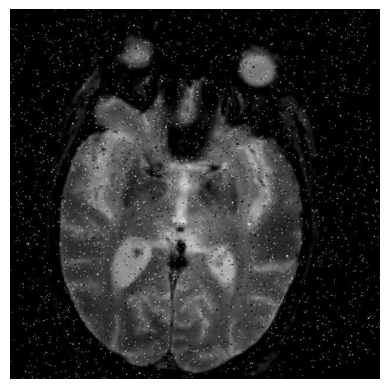

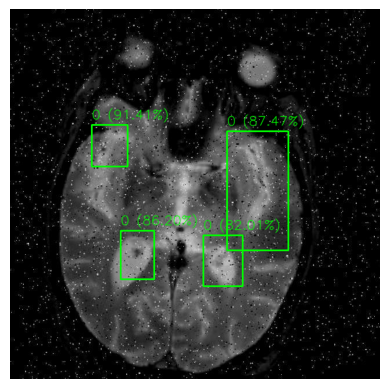

127.0.0.1 - - [19/Apr/2024 21:56:17] "POST /alzhimer HTTP/1.1" 200 -


this is form iot device


In [8]:
from flask import Flask, request
import pybase64
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt



app = Flask(__name__)
# ngrok.set_auth_token("2TtkAFw1fCm1zSGSyHayficyps2_5JmYLDNZSBu7bwi43KTdg")
# public_url =  ngrok.connect(port_no).public_url
# CORS(app, resources={r"/*": {"origins": "https://gojoradixai.netlify.app"}})
CORS(app, resources={r"/*": {"origins": "*"}})

@app.route("/alzhimer",methods=["POST"])
def decode_base64_and_display_alzhimer():
    try:
        data = request.json
        base64_string = data["base64"]
        predictions_json = data["predictions"]
        disease_name = data["disease"]
        print(predictions_json)
        predictions = json.loads(predictions_json)['predictions']


        decoded_data = pybase64.b64decode(base64_string)
        image = Image.open(io.BytesIO(decoded_data))
        temp_file_path = "C:\\Users\\djsma\\Downloads\\temp_image.jpg"
        image.save(temp_file_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        # highlighted_image = highlight_regions(temp_file_path,predictions)
        highlighted_image = highlight_regions(temp_file_path,predictions)

        
        plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
        image_with_rectangle = Image.fromarray(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


        buffered = io.BytesIO()
        image_with_rectangle.save(buffered, format='jpeg')
        final_base64_string = base64.b64encode(buffered.getvalue()).decode()
        inference = 'this is form iot device'
        print(inference)

        return jsonify({
        "base64" : final_base64_string,
        "inference" : inference
         })

    except Exception as e:
        print(e)
        return jsonify({
        "status" : "something went wrong",
         })    
# print(f"To acces the Gloable link please click {public_url}")

app.run(port=port_no)